# High-traffic recipe prediction
This project is for the data scientist associate practical exam. The exam evaluates the skills in data validation/visualization, model fitting/evaluation, and communication. Detailed information on rubrics can be found [here](https://app.datacamp.com/certification/resource-center/practical-hub#data-scientist-associate)

### Background:
An online business seeks to develop a model that predicts high-traffic recipes with 80% accuracy. This enables the product manager to make the best decisions, display popular recipes on the main page, and drive more traffic and subscribers. Achieving this prediction accuracy will help content and audience engagement strategy development and business growth.

## Data validation:
The original dataset have 947 rows and 8 columns
- recipe, there is not missing values and it is numeric
- calories, there are 52 missing values and drop rows contains missing values
- carbohydrate, there are 52 missing values and drop rows contains missing values
- sugar, there are 52 missing values and drop rows contains missing values
- protein, there are 52 missing values and drop rows contains missing values
- category, there are 11 categories, update Chicken Breast as Chicken
- servings, there 6 different strings, update '4 as a snack' as '4', '6 as a snack' as '6' and convert the entire group value as int
- high_traffic, there are 373 missing values and replace these missing values as Low

The final dataset have 895 rows and 8 columns

## Exploratory Analysis:
### Popularity distribution
![img](p1.png)

The cleaned dataset consists of 535 data points labeled as High and 360 data points labeled as Low in the high_traffic category. The distribution of the dataset is not perfectly balanced(50-50), but it is acceptable for predicting high-traffic category.

### Category and servings
![img](p2.png)

There are 10 groups in the recipe category. Among these categories, the most popular one is Chicken with 163 recipes, followed by Breakfast with 106 recipes. On the other hand, The least popular category is One Dish Meal, which only has 67 recipes.

![img](p3.png) 

![img](p4.png)

![img](p5.png)

Even though Chicken recipes have the highest number of recipes, it also has the highest number of low traffic(94 out of 163). Similarly, 73 out of 106 breakfast recipes are unpopular. Interestingly, for beverage recipes(92), only 5 of them are popular. In contrast, vegetable (1 out of 78), potato(5 out of 83), and pork(7 out of 73) have the lowest number of unpopular recipes.

Additionally, there are four serving size groups, which are 1,2,4,5 respectively. Most of the recipes in the dataset are intended to serve four people. Recipes for serving four people have the highest number of popular and unpopular recipes than in other serving-size groups.

Category and servings may be the key factors to determine high-traffic recipes.
### Nutrition Facts
![img](p6.png)
![img](p7.png)
![img](p8.png)
![img](p9.png)

From nutrition facts(calories, carbohydrates, sugar, protein), there are no noticeable patterns for different categories and servings.

## Model Development & Evaluation
### Model selection
- This is a supervised classification problem since traffic high has been labeled 
- Models try in this case are GaussianNB, LogisticRegression, DecisionTreeClassifier and GradientBoostingClassifier
- GaussianNB and LogisticRegression do not pass model assumptions
- Models used for comparisions are DecisionTreeClassifier and GradientBoostingClassifier

### Model comparisons
![img](p10.png)

- The team aims to achieve 80% accuracy on model predictions, correctly classified popular and unpopular recipes
-  The dataset was divided into three parts for model training, testing, and validating 65% of the data used for training, and the remaining data was split by 80% for testing and 20% for validating
-  Besides accuracy, recall, accuracy, and F1 are important metrics to measure model performance
    - Precision, the proportion of predicted high-traffic recipes out of all predicted high-traffic recipes. Higher precision, lower false positives, less unpopular recipes identified as popular ones
    - Recall, the proportion of predicted high-traffic recipes out of all high-traffic recipes. Higher recall, lower false negatives, less popular recipes identified as unpopular ones
    - F1, the measure of the balance of the model for precision and recall.
- After tuning hyperparameters, the DecisionTreeClassifier and GradientBoostingClassifier model make improvements on accuracy, recall, accuracy, and F1 

## Metric for the business
![img](p10.png)

- Comparing models before/after tuning models on testing sets, both tuned models achieved 80% accuracy
- The winning model is DecisionTreeClassifier
- It has a higher value of accuracy, recall, accuracy, and F1 than that in GradientBoostingClassifier

![img](p11.png)

From the DecisionTreeClassifier model, the top 3 important features are  Beverage, Breakfast, and Chicken. This is due to their large base in the dataset.

## Summary
For predicting popular recipes, the DecisionTreeClassifier model can be implemented into the business by correctly predicting high-traffic recipes with 80% accuracy. This would help the team to identify high-traffic recipes to improve traffic and obtain more subscribers with relevant business strategies.

To recommend the next step:
- Testing the model with other datasets and evaluating its performance if correctly predicting high-traffic recipes 80% of the time
- Creating a confusion matrix to identify factors that contributed to misclassification and refining the model by tuning hyperparameters or feature engineering if the model fails to achieve the desired goal of accuracy 
- Deploying/ Integrating the model into the business pipeline/environment to continue monitoring the model performance
- Implementing a monitor system to track and alter any significant change in the model by collecting feedback to access if the model correctly predicts high-traffic recipes
- Updating the model periodically with new data to ensure its performance aligns with business metrics on high traffic
- Preparing alternative models as backups in case of DecisionTreeClassifier model fails to achieve the desired accuracy in previous steps, potential backup models are Random Forest or Neural Networks

In [1]:
import pandas as pd


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
#load data
data  = pd.read_csv('recipe_site_traffic_2212.csv')

#make a copy
df = data.copy()

In [3]:
#check data description
df.describe(include='all')

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
count,947.000000,895.000000,895.000000,895.000000,895.000000,947,947,574
unique,NaN,NaN,NaN,NaN,NaN,11,6,1
top,NaN,NaN,NaN,NaN,NaN,Breakfast,4,High
freq,NaN,NaN,NaN,NaN,NaN,106,389,574
mean,474.000000,435.939196,35.069676,9.046547,24.149296,NaN,NaN,NaN
std,273.519652,453.020997,43.949032,14.679176,36.369739,NaN,NaN,NaN
min,1.000000,0.140000,0.030000,0.010000,0.000000,NaN,NaN,NaN
25%,237.500000,110.430000,8.375000,1.690000,3.195000,NaN,NaN,NaN
50%,474.000000,288.550000,21.480000,4.550000,10.800000,NaN,NaN,NaN
75%,710.500000,597.650000,44.965000,9.800000,30.200000,NaN,NaN,NaN


In [4]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
#check the first few row
df.head(3)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN


In [6]:
# fill missing value on high_traffic as Low
df['high_traffic'].fillna('Low', inplace=True)

In [7]:
#check the unique value of servings
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [8]:
# replace '4 as a snack' as '4', '6 as a snack' as '6' and convert into int
df['servings'] = df['servings'].apply(lambda x: int(x[0]))

In [9]:
#checking the value category
df['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [10]:
#set chicken bresat as chcken
df.loc[df['category'] == 'Chicken Breast',  'category'] = 'Chicken'

In [11]:
#check the missing rows
df.loc[df.isna().any(axis=1)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,Low
48,49,NaN,NaN,NaN,NaN,Chicken,4,Low
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [12]:
df.pivot_table(values=['calories', 'carbohydrate', 'sugar', 'protein'], index=['category', 'servings'], aggfunc=['mean','std'])

mean               ...        std           
                          calories carbohydrate  ...    protein      sugar
category      servings                           ...                      
Beverages     1         180.341000    13.237000  ...   0.803337   6.394603
              2         245.478824    21.030000  ...   0.419054  18.799854
              4         162.894706    14.629118  ...   0.492190  17.492517
              6         144.427619    16.586190  ...   0.451712   4.259517
Breakfast     1         401.969615    39.189615  ...  25.607984   3.774985
              2         374.082857    41.820000  ...   9.712348   7.642324
              4         266.214634    40.415122  ...  13.106068   8.152152
              6         330.973889    36.403889  ...  10.297373  11.953739
Chicken       1         529.023429    20.544571  ...  33.328337   5.924025
              2         503.795517    39.294138  ...  60.725936   6.293156
              4         571.156377    25.284058  ...  33.549751   5.885817
              6         578.688333    19.032333  ...  84.725105   5.036748
Dessert       1         317.120625    50.169375  ...   5.278169  39.647529
              2         256.160769    42.809231  ...   5.826586  38.559768
              4         372.850714    73.439643  ...   3.335002  32.927106
              6         410.706000    43.521000  ...   4.723760  22.195240
Lunch/Snacks  1         591.517059    39.027059  ...   9.020243   4.541062
              2         473.288000    53.782000  ...  61.146008   5.917406
              4         461.155806    39.235161  ...  20.561687   7.840210
              6         411.296842    43.412632  ...   9.214188   4.315684
Meat          1         659.651538    29.419231  ...  30.398623   4.688348
              2         636.413077    22.022308  ...  49.415221   9.090060
              4         571.235588    20.028235  ...  41.432312   6.448304
              6         498.903571    20.722143  ...  33.330328   2.573138
One Dish Meal 1         770.896923    47.323846  ...  23.744126   4.695863
              2         534.366818    29.879091  ...  48.327458   6.596458
              4         570.316667    61.967619  ...  32.060915   4.422897
              6         458.604545    72.892727  ...  19.189848  10.240854
Pork          1         716.210000    32.642222  ...  58.286033   7.087641
              2         565.615625    30.924375  ...  18.814397   7.801510
              4         575.858485    29.088182  ...  43.360296   9.270877
              6         764.641333    20.072000  ...  59.416084  12.292864
Potato        1         616.695000    68.992143  ...  12.007017   4.171291
              2         312.203000    69.528000  ...   5.573517   1.996792
              4         432.185000    58.071111  ...  10.633200   3.096775
              6         346.359565    46.728261  ...   5.704054   3.450773
Vegetable     1         222.646667    30.360000  ...   3.863334   3.234957
              2         175.022222    20.510000  ...   9.419844   5.808500
              4         247.720000    26.098500  ...   7.662829   4.264533
              6         336.862857    17.979286  ...  12.570982   8.763421

[40 rows x 8 columns]

In [13]:
#drop missing values
df.dropna(inplace=True)

The variation of calories, carbohydrate, sugar, and protein on different categories and servings are big among data. There are only 52 rows out of 947 contains missing values. Therefore drop these rows.

In [14]:
df.describe(include="all")

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
count,895.000000,895.000000,895.000000,895.000000,895.000000,895,895.000000,895
unique,NaN,NaN,NaN,NaN,NaN,10,NaN,2
top,NaN,NaN,NaN,NaN,NaN,Chicken,NaN,High
freq,NaN,NaN,NaN,NaN,NaN,163,NaN,535
mean,473.652514,435.939196,35.069676,9.046547,24.149296,NaN,3.458101,NaN
std,272.763283,453.020997,43.949032,14.679176,36.369739,NaN,1.735979,NaN
min,2.000000,0.140000,0.030000,0.010000,0.000000,NaN,1.000000,NaN
25%,237.500000,110.430000,8.375000,1.690000,3.195000,NaN,2.000000,NaN
50%,475.000000,288.550000,21.480000,4.550000,10.800000,NaN,4.000000,NaN
75%,708.500000,597.650000,44.965000,9.800000,30.200000,NaN,4.000000,NaN


# EDA

In [15]:
def count_plot(df, feature_name, title_name):
    """
    show count plot on given feature name in datafrane with a title
    args:
        df : dataframe
        feature_name : the name of feature interested
        title_name : the tilte of plot
    """
    fig = sns.countplot(
        data = df,
        y = feature_name
    )
    #show value on the bar
    for i in fig.patches:
        fig.annotate('{:.0f}'.format(i.get_width()),  (i.get_width(), i.get_y()+ i.get_height()/2), ha = 'left')

    #set y-axis invisible
    fig.axes.get_xaxis().set_ticks([])
    plt.title(title_name)
    plt.show()
    

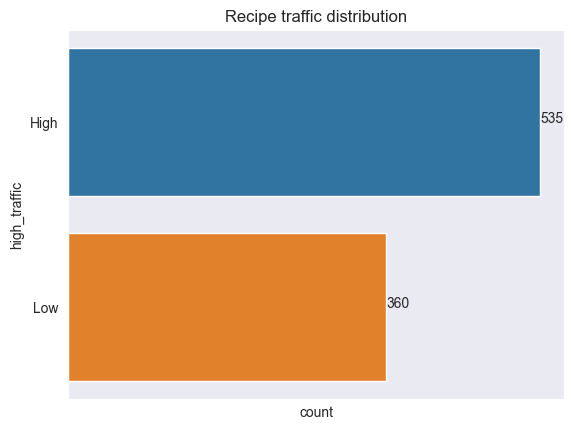

In [16]:
count_plot(df, "high_traffic", "Recipe traffic distribution")

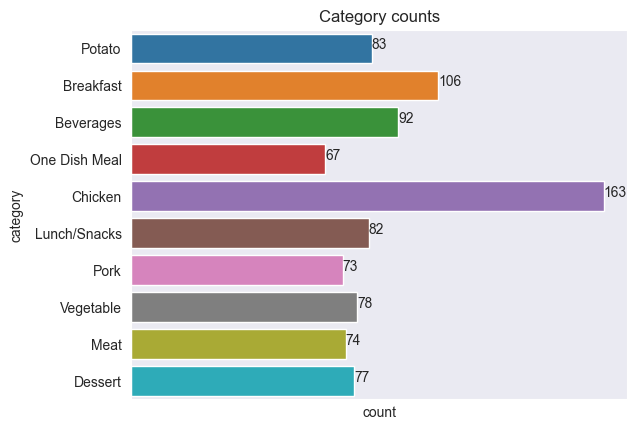

In [17]:
count_plot(df, 'category' , "Category counts")

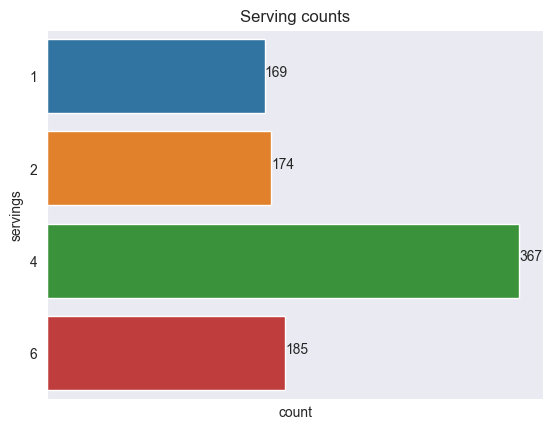

In [18]:
count_plot(df, 'servings' , "Serving counts")

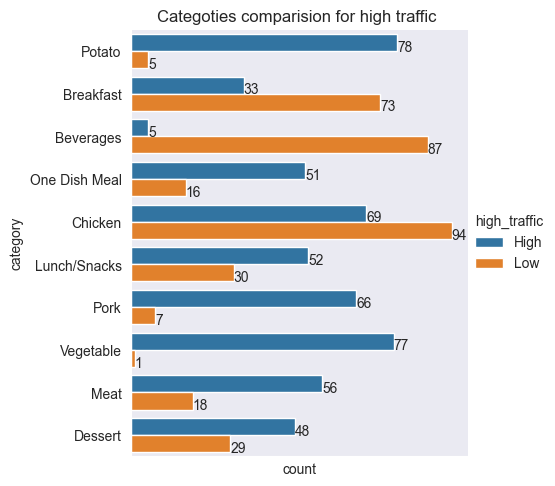

In [19]:
# which category has high traffic
fig = sns.catplot(
    data = df,
    y = 'category',
    hue = 'high_traffic',
    kind = 'count'
)

#get axis 
ax  = fig.ax

#show values
for i in ax.patches:
    ax. annotate("{:.0f}".format(i.get_width()), (i.get_width(), i.get_y() + i.get_height()), ha = 'left')

#show values
ax.get_xaxis().set_ticks([])
plt.title("Categoties comparision for high traffic ")
plt.show()

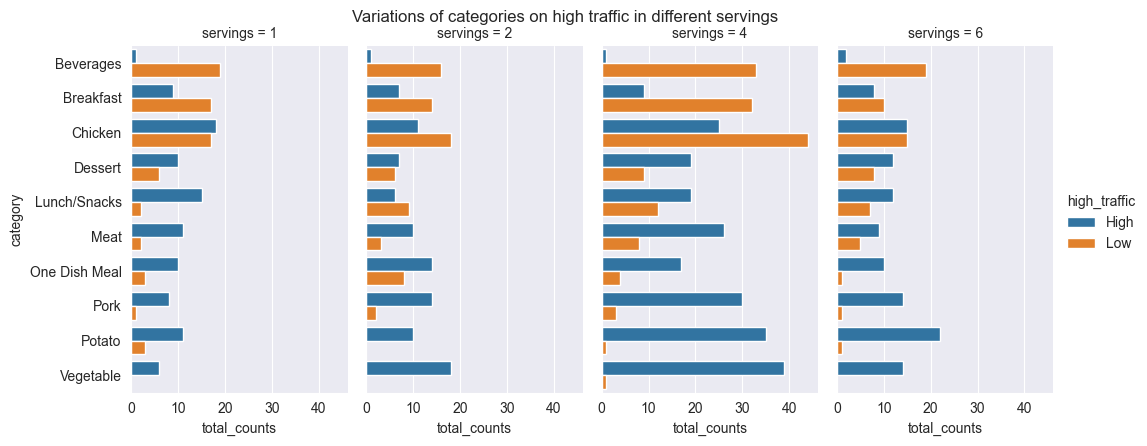

In [20]:
#comparing serving for different categories for high traffic

cat_comparions = df.groupby(['high_traffic', 'category', 'servings']).agg( total_counts = ('recipe', 'count')).reset_index()

fig1 = sns.catplot(
     
    data = cat_comparions,
    y = 'category',
    x = 'total_counts',
    hue = 'high_traffic',
    col= 'servings',
    kind = 'bar',
    aspect = 0.6,
    height =  4.5
)
fig1.fig.subplots_adjust(top=0.9)
fig1.fig.suptitle("Variations of categories on high traffic in different servings")
plt.show()

In [21]:
df.groupby(['high_traffic', 'servings'])[['recipe']].agg(total_counts = ('recipe', 'count')).reset_index()

,high_traffic,servings,total_counts
0,High,1,99
1,High,2,98
2,High,4,220
3,High,6,118
4,Low,1,70
5,Low,2,76
6,Low,4,147
7,Low,6,67


After cleaning the data, the dataset consists of 535 data points labeled as High and 360  data points labeled as Low in the high_traffic category. The distribution of the dataset is not perfectly balanced(50-50), but it is acceptable for predicting high-traffic category.

There are 10 groups in the recipe category. Among these categories, the most popular one is Chicken with 163 recipes, followed by Breakfast with 106 recipes. On the other hand, The least popular category is One Dish Meal, which only has 67 recipes.


Even though Chicken recipes have the highest number of recipes, it also has the highest number of low traffic(94 out of 163).  Similarly, 73 out of 106 breakfast recipes are unpopular. Interestingly, for beverage recipes(92), only 5 of them are popular. In contrast, vegetable (1 out of 78), potato(5 out of 83), and pork(7 out of 73) have the lowest number of unpopular recipes.

Additionally, there are four serving size groups, which are 1,2,4,5 respectively. Most of the recipes in the dataset are intended to serve four people. Recipes for serving four people have the highest number of popular and unpopular recipes than in other serving-size groups.

To sum up, recipe category and servings have significant impacts on traffic.

In [22]:
#distribution plot
def dist_plot(df, feature_name):
    """
    show distribution plot on given feature name in datafrane with a title
    args:
        df : dataframe
        feature_name : the name of feature interested
        
    """
    fig = sns.catplot(
        data = df,
        y = 'category',
        x = feature_name,
        #hue = 'category',
        hue = 'high_traffic',
        kind = 'point',
        col = 'servings',
        aspect = 0.6,
        height =  4.5
        #bw=.25, 
        #cut=0, 
        #split=True
        #showfliers = False
    )
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Average {} comparisons'.format(feature_name))
    plt.show()
    

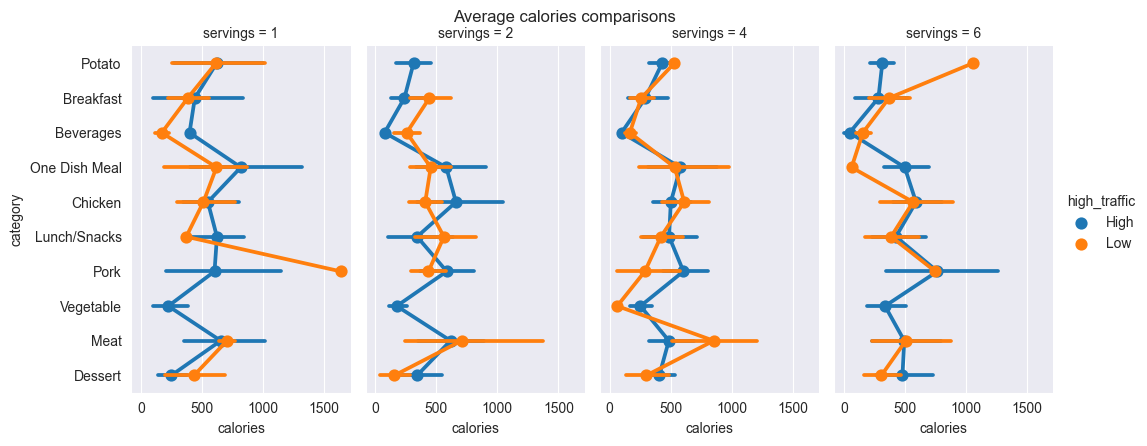

In [23]:
dist_plot(df, 'calories')

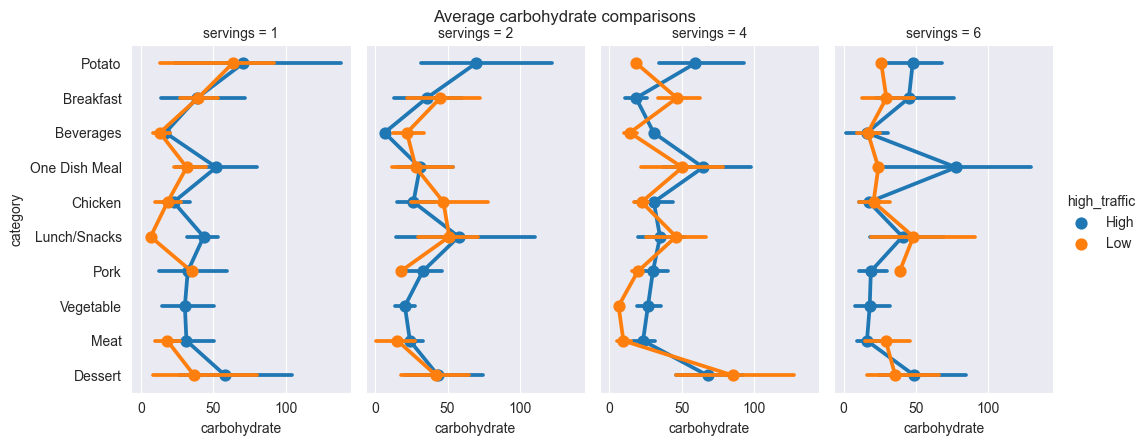

In [24]:
dist_plot(df, 'carbohydrate')

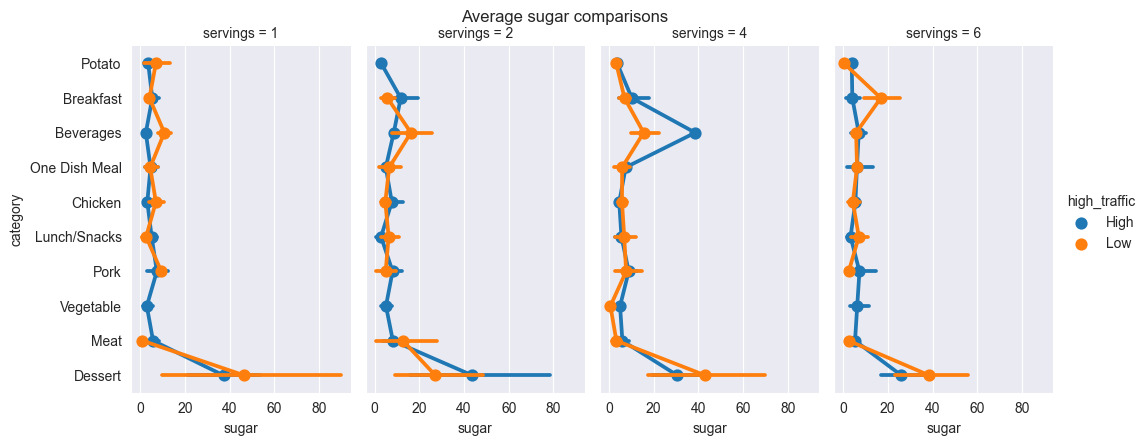

In [25]:
dist_plot(df, 'sugar')

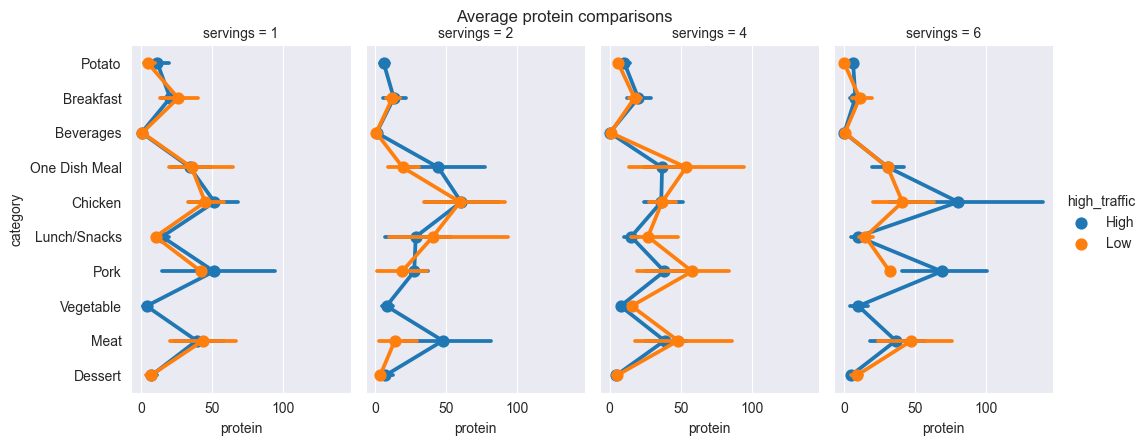

In [26]:
dist_plot(df, 'protein')

From nutrition facts(calories, carbohydrates, sugar, protein), there are no noticeable patterns for different categories and servings.

In [27]:
#one_hot_encoding for categorical variables
df_final = pd.get_dummies(df, columns=['category', 'high_traffic'], prefix= '', prefix_sep='')

In [28]:
df_final.head(2)

,recipe,calories,carbohydrate,sugar,protein,servings,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable,High,Low
1,2,35.48,38.56,0.66,0.92,4,0,0,0,0,0,0,0,0,1,0,1,0
2,3,914.28,42.68,3.09,2.88,1,0,1,0,0,0,0,0,0,0,0,0,1


# Model Selection & Evalaution

In [29]:
#create features and dependent variable
X = df_final.drop(columns=['recipe', 'Low', 'High'])
y = df_final['High']

# create training, testing and validating sets
X_train, X_remain, y_train, y_remain = train_test_split( X, y, test_size=0.35, random_state= 42, stratify= y )

X_test, X_valid, y_test, y_valid  = train_test_split(X_remain, y_remain, test_size= 0.8, random_state= 22, stratify=  y_remain )


Assumption of GaussianNB
1.  Assumes that the features are independent of each other given the class labels
2.  Assumes that the features follow a Gaussian (normal) distribution

The content of the recipe, calories, carbohydrate, sugar, protein, and servings are independent, first condition satisfied

From qqplot, the distribution of blue dots on independent features is not a straight line. Therefore, the GaussianNB model does not fit

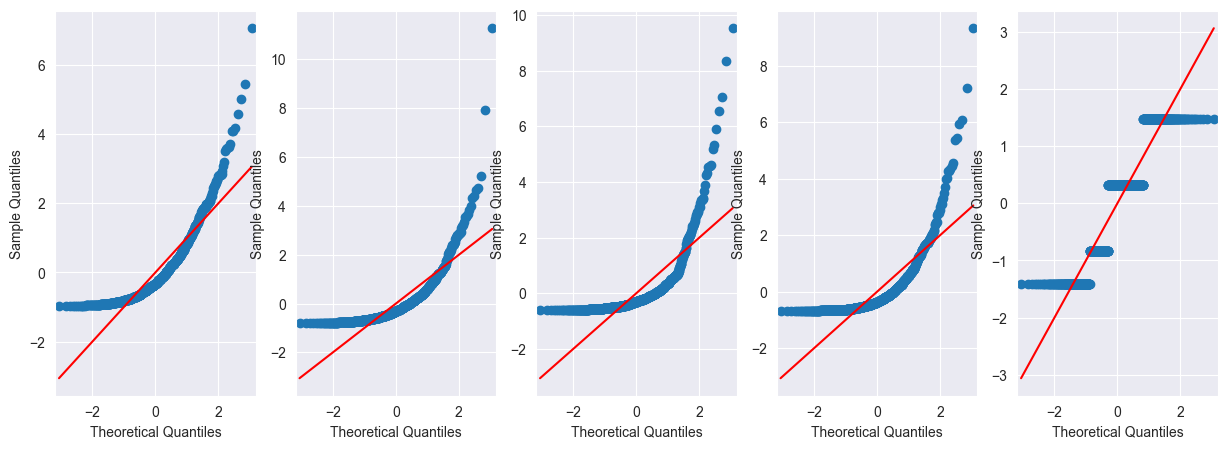

In [30]:
#q-q plot:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
sm.qqplot(df['calories'], line='s', fit=True, ax=axs[0])
sm.qqplot(df['carbohydrate'], line='s', fit=True, ax=axs[1])
sm.qqplot(df['sugar'], line='s', fit=True, ax=axs[2])
sm.qqplot(df['protein'], line='s', fit=True, ax=axs[3])
sm.qqplot(df['servings'], line='s', fit=True, ax=axs[4])
plt.show()

In [31]:
#create nb model
nb = GaussianNB()

#train model
nb.fit(X_train, y_train)

#predict values
y_pred_nb = nb.predict(X_test)

Assumption of Logistic regression
1. Binary outcome
2. Observations are independent
3. A linear relationship between the features and the log-odds of the target variable
4. No multicollinearity 
5. No extreme outliers


The output of predicting high-traffic is 0 or 1, binary outcome satisfied

Each observations are indepedent since the content of each recipe is independent

The Residual analysis plot displayed below does not show a random cloud shape, therefore, condition 3 does not hold,logistic regression cannot be applied 

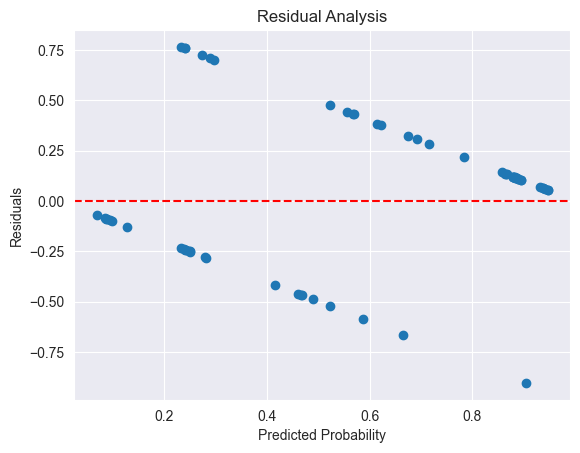

In [32]:
#logistic regression
lr = LogisticRegression(random_state=1)

#train model
lr.fit(X_train, y_train)

#predict probablity
y_pred_proba = lr.predict_proba(X_test)[:, 1]

#calculate residuals
residuals  = y_test - y_pred_proba

#plot scatter plot
plt.scatter(y_pred_proba, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

Assumption of tree-based models (Decision tree, GradientBoostingClassifier)
- no assumptions, can handle linear and non-linear

In [33]:
# decision tree
dt = DecisionTreeClassifier(random_state= 1)

#train model
dt.fit(X_train, y_train)

#predict values
y_pred_dt = dt.predict(X_test)

In [34]:
# decision tree
gb = GradientBoostingClassifier(random_state= 1)

#train model
gb.fit(X_train, y_train)

#predict values
y_pred_gb = gb.predict(X_test)

In [35]:
# function to display evaluated metric

def evaluation(y_true, y_predict):
    """
    This is a function for displaying evaluation metric on Accuracy, F1, precision, and recall
    args: y_true the real values
          y_preidct predicting values
    print out 4 evaluation calues
    """
    print("Accuracy: {:.3f}".format(accuracy_score(y_true, y_predict)))
    print("Precision: {:.3f}".format(precision_score(y_true, y_predict)))
    print("Recall: {:.3f}".format(recall_score(y_true, y_predict)))
    print("F1: {:.3f}".format(f1_score(y_true, y_predict)))

In [36]:
print("Decision Tree Classifier model:")
evaluation(y_test, y_pred_dt)

Decision Tree Classifier model:
Accuracy: 0.758
Precision: 0.844
Recall: 0.730
F1: 0.783


In [37]:
print("GradientBoostingClassifier model:")
evaluation(y_test, y_pred_gb)

GradientBoostingClassifier model:
Accuracy: 0.790
Precision: 0.816
Recall: 0.838
F1: 0.827


In [38]:
#confusing matrix function

def matrix_plot(model):
    """
    ploting confusion matrix 
    args: y_true the real values
          y_preidct predicting values
          model the model used for classfication
    show confusion matrix plot
    """
    #calculate confusion matrix
    #cm = confusion_matrix(y_true, y_predict)
    
    #display confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()


Decision Tree Classifier model:


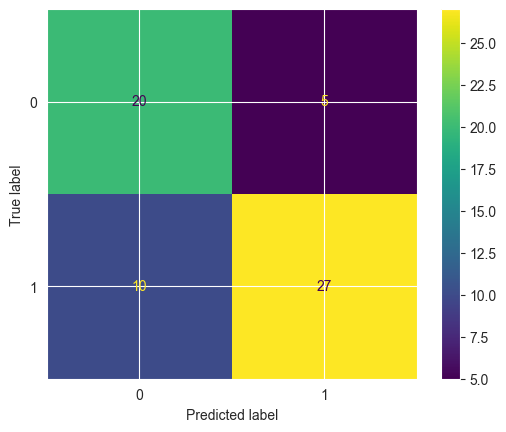

In [39]:
print("Decision Tree Classifier model:")
matrix_plot(dt)

GradientBoostingClassifier model:


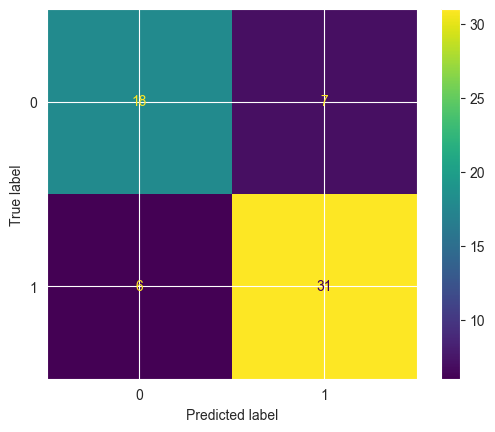

In [40]:
print("GradientBoostingClassifier model:")
matrix_plot(gb)

Before tuning hyperparameters of models:

| Models             | Accuracy       | Recall         | Precision      |   F1           |
| --------------     | -------------- | -------------- | -------------- | -------------- |
| Decision Tree      | 0.758          |        0.730   |      0.844     |           0.783|
| GradientBoosting   | 0.790          |         0.838  |       0.816   |          0.827 |

For the scope of this project, the team desires to achieve predicting high-traffic recipes 80% of the time and minimizing the display of unpopular recipes. The primiary goal is to achieve 80% of accuarcy on model prediction, which is the measurement of overall correctness of predition. Additionally, the model should pay attention on preicsion, recall, and f1

Precision is accuracy of prediction, how many predicted popular recipes are acutally popular, defined as TP/(TP+FP)

Replacing unpopular recipes as popular recipes for display on the company website would lead to decrease traffic, lower number of subscriptions and less sales for generating revenue

Recall is how many popular recipes that model correcctly identy, defined as TP/(TP+FN)

Missing pupular recipes due to false negative would be bad for business opportunities to gain more subscriers

F1 is measure the balance of precision and recall, defined as 2 * (precision * recall) / (precision + recall)


Confusion matrix:

| Models             | TP             | TN             | FN             | FP             |
| --------------     | -------------- | -------------- | -------------- | -------------- |
| Decision Tree      | 27             |            20  |            10  |            5  |
| GradientBoosting   | 31             |            18  |            6   |            7  |


For one-hot-encoding, converting categorical value into numerical values. The target variable of high_traffic(High) has set to be "1", which means high_traffic(0) to be "0".

- True positive(TP): correctly classify High
- True negative(TN): correctly classify Low
- False positive(FP): the actual label is Low but misclassified as High
- False negative(FN): the actual label is High but misclassified as Low



In general, two models have a higher value in false positives than that in false negatives. GradientBoosting have sligtly better performance than Decision Tree from Accuracy, Recall, Precision and F1          

Let's try tuning model hyperparameters by focusing on accuracy if there are any improvements in model performance for accuracy, recall, precision, and f1.


In [41]:
#tuning dt model
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [4,5,6],
    'max_features' :['None', 9 , 10, 11]
}

dt_grid = GridSearchCV(dt, param_grid=param_grid_dt, refit='accuracy', n_jobs=-1 )

In [42]:
# train model
dt_grid.fit(X_train, y_train)

#show the best model
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=9,
                       random_state=1, splitter='random')

In [43]:
#get model evaluation
print("Decision Tree Classifier model after tuning on validation sets:")
evaluation(y_valid, dt_grid.best_estimator_.predict(X_valid))

Decision Tree Classifier model after tuning on validation sets:
Accuracy: 0.766
Precision: 0.807
Recall: 0.801
F1: 0.804


In [44]:
#tuning gb model
param_grid_gb = {
    'learning_rate': [0.1, 0.01, 0.001, 0.2],
    'n_estimators': [50, 75, 100],
    'max_depth': [4,5,6],
    'max_features' :['None', 9 , 10, 11]
}

gb_grid = GridSearchCV(gb, param_grid=param_grid_gb, refit='accuracy', n_jobs=-1 )

In [45]:
# train model
gb_grid.fit(X_train, y_train)

#show the best model
gb_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features=11,
                           random_state=1)

In [46]:
#get model evaluation
print("GradientBoosting Classifier model after tuning on validation sets:")
evaluation(y_valid, gb_grid.best_estimator_.predict(X_valid))

GradientBoosting Classifier model after tuning on validation sets:
Accuracy: 0.758
Precision: 0.781
Recall: 0.828
F1: 0.804


Model performance on vaidation sets

| Models             | Accuracy       | Recall         | Precision      |   F1           |
| --------------     | -------------- | -------------- | -------------- | -------------- |
| Tuned Decision Tree      | 0.766          |        0.801   |      0.807     |          0.804 |
| Tuned GradientBoosting   | 0.758          |         0.828  |       0.781    |          0.804 |

Both tuned models do not achieve 80% accuracy. The primary goal should focus on the performance of the testing set to ensure models generalized unseen data.

Let's assess tuned models on the testing set.

In [47]:
#get model evaluation
print("Decision Tree Classifier model after tuning on testing sets:")
evaluation(y_test, dt_grid.best_estimator_.predict(X_test))

Decision Tree Classifier model after tuning on testing sets:
Accuracy: 0.823
Precision: 0.861
Recall: 0.838
F1: 0.849


In [48]:
#get model evaluation
print("GradientBoosting Classifier model after tuning on testing sets:")
evaluation(y_test, gb_grid.best_estimator_.predict(X_test))

GradientBoosting Classifier model after tuning on testing sets:
Accuracy: 0.806
Precision: 0.838
Recall: 0.838
F1: 0.838


Model performance on testing sets

| Models             | Accuracy       | Recall         | Precision      |   F1           |
| --------------     | -------------- | -------------- | -------------- | -------------- |
| Decision Tree      | 0.696          |        0.687   |      0.780     |          0.730 |
| GradientBoosting   | 0.795          |        0.776   |      0.867     |          0.819 |
| Tuned Decision Tree      | 0.823          |        0.838   |      0.861     |          0.849 |
| Tuned GradientBoosting   | 0.806          |         0.838  |       0.838    |          0.833 |

Both models have improved performance on accuracy, recall, precision, and f1 after tuning hyperparameters.
Overall, the best model is Tuned Decision Tree, since it has higher scores on accuracy, recall, precision, and f1 than that in the GradientBoosting model.

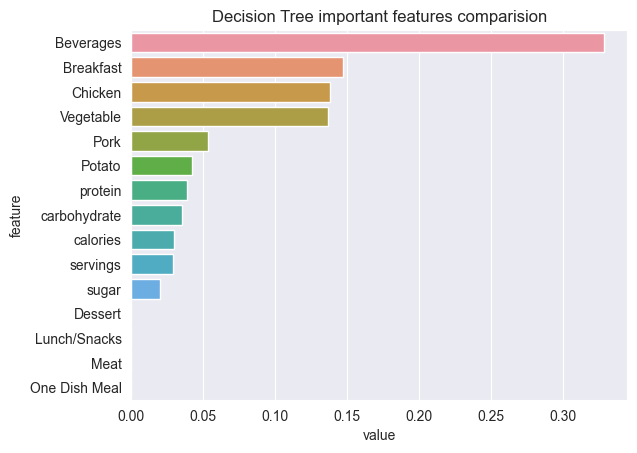

In [49]:
#model important features
important_features = pd.DataFrame({'feature': dt_grid.best_estimator_.feature_names_in_,
                                    'value' : dt_grid.best_estimator_.feature_importances_})
sns.barplot(
    data = important_features.sort_values(by='value', ascending=False),
    x = 'value',
    y = 'feature'
)
plt.title("Decision Tree important features comparision")
plt.show()